# Imports

In [1]:
import os
from PIL import Image
import shutil
import random

In [2]:
from Crypto.Cipher import DES3
from Crypto.Util.Padding import pad, unpad
import secrets

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Reshape Image

In [4]:
path = './data/Train/TDES/ECB/Non_Enc/'

image_files = [f for f in os.listdir('./data/Train/TDES/ECB/Non_Enc/') if f.endswith(('.jpg', '.png', '.jpeg'))]

for img_name in image_files:
    read_path = os.path.join(path, img_name)
    image = Image.open(read_path)
    new_image = image.resize((64,64))
    new_image.save('./data/Train/TDES/ECB/Img_Non_Enc/' + img_name)

# Encrypting Images

In [5]:
def getKey(keysize):

    key = secrets.token_bytes(keysize)
    return key

In [26]:
def tdes_ecb_encrypt_image(filename, input_image_path, key):

    B_size = 16

    encrypted_filename ="TDES_ECB_Enc_" + filename
    encrypted_filepath = os.path.join('./data/Train/TDES/ECB/TDES_ECB_Enc', "TDES_ECB_Enc_" + filename)

    # Read the image
    with open(input_image_path, 'rb') as f:
        image_data = f.read()

    # Create a 3DES cipher object
    cipher = DES3.new(key, DES3.MODE_ECB)

    # Pad the image data to fit block size
    padded_data = pad(image_data, DES3.block_size)

    # Encrypt the padded data
    encrypted_data = cipher.encrypt(padded_data)

    # Save the encrypted data to a new image file
    with open(encrypted_filepath, 'wb') as f:
        f.write(encrypted_data)
    
    return encrypted_filename

In [27]:
path = './data/Train/TDES/ECB/Img_Non_Enc/'

image_files = [f for f in os.listdir('./data/Train/TDES/ECB/Img_Non_Enc/') if f.endswith(('.jpg', '.png', '.jpeg'))]

for img_name in image_files:
    read_path = os.path.join(path, img_name)

    # Generate a random 24-byte key for 3DES (192 bits)
    key = getKey(24)

    # Encrypt the image
    encrypted_filename = tdes_ecb_encrypt_image(img_name, read_path, key)

    print("Enc File Name:", encrypted_filename, "Key:", key)

    # Save the details to a file
    with open('./data/Train/TDES/ECB/Encryption_details/Encryption_details.txt', 'a') as file:
        file.write(f"Image File: {img_name}, Encrypted File: {encrypted_filename}, Key: {key}\n")

Enc File Name: TDES_ECB_Enc_Eight_full (1).jpg Key: b'IX\xcbZ\x95\x18\xb1\xf7\x94v\x11\x19d\xa2\xd9\x0f\x86\x8df[j[\xb4\x88'
Enc File Name: TDES_ECB_Enc_Eight_full (10).jpg Key: b'\xe75h\xeb\x14\xe9DP|\xfd\xe9Z\x1c3l\xfbI\xf51\xa7\xf5\x12\xac\xe3'
Enc File Name: TDES_ECB_Enc_Eight_full (100).jpg Key: b'\x90\x9a\xc9\xf8\xde\xfep\xd8[G\xc9\x98"kn\x0e\xf8\x80*\xf1\r\x89$L'
Enc File Name: TDES_ECB_Enc_Eight_full (101).jpg Key: b')\r\xd1\xd67\x97\xdf\xb2bM\xf4\xef\xce\xad\x8f\x84\xb4\x01\xb7C\x02\xbb\x7fO'
Enc File Name: TDES_ECB_Enc_Eight_full (102).jpg Key: b'~\xf20}a\xedy?\xb0\xed/\xd0\r\xe4X\x0c\xf7`\xc7\xd8\xa0t:\xab'
Enc File Name: TDES_ECB_Enc_Eight_full (103).jpg Key: b"\xfd\xc0`\xe7|\x16\xcf\x93\xc6@\x1f\x96\x97\x19g|\xa0'\xf2\xc3i\x92\xb3\xd5"
Enc File Name: TDES_ECB_Enc_Eight_full (105).jpg Key: b'\x92\x8c<\x7f\xcd\x9b\x9a\xca\xd0$i\xbb\xd9V\x83H\xb2SM8\xb62\xccE'
Enc File Name: TDES_ECB_Enc_Eight_full (106).jpg Key: b'Wvb\x04sM\x87\x9a%\x80r\x8b\xcb\\\xfe\xff\x1bUL\xa9\xe5\x8a\x

# Decrypting Images

In [28]:
def tdes_ecb_decrypt_image(filename, key):
    decrypted_filename = "TDES_Dec_" + filename
    decrypted_filepath = './data/Train/TDES/ECB/TDES_ECB_Dec/' + decrypted_filename

    # Read the encrypted image data
    with open('./data/Train/TDES/ECB/TDES_ECB_Enc/' + filename, 'rb') as file1:
        encrypted_data = file1.read()

    # Create a 3DES cipher object
    cipher = DES3.new(key, DES3.MODE_ECB)

    # Decrypt the data
    decrypted_data = unpad(cipher.decrypt(encrypted_data), DES3.block_size)

    # Save the decrypted data to a new image file
    with open(decrypted_filepath, 'wb') as file2:
        file2.write(decrypted_data)

    return decrypted_filename

In [29]:
# Input for the file to decrypt
filename_to_decrypt = 'TDES_ECB_Enc_Eight_full (1).jpg'

# Input for the key
key = b'IX\xcbZ\x95\x18\xb1\xf7\x94v\x11\x19d\xa2\xd9\x0f\x86\x8df[j[\xb4\x88'


# Decrypt the image using user-provided inputs
decrypted_filename = tdes_ecb_decrypt_image(filename_to_decrypt, key)

print("Decrypted File Name:", decrypted_filename)

Decrypted File Name: TDES_Dec_TDES_ECB_Enc_Eight_full (1).jpg


# Visualising image before encryption, after encryption and after decryption

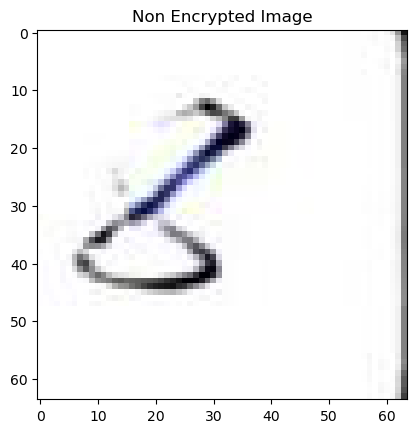

(64, 64, 3)


In [31]:
image_path = './data/Train/TDES/ECB/Img_Non_Enc/Eight_full (1).jpg'
image = plt.imread(image_path)
plt.imshow(image)
plt.title('Non Encrypted Image')
plt.show()
print(image.shape)

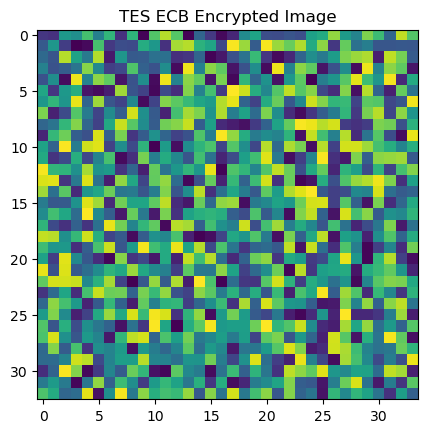

(33, 34)


In [6]:
image_path = './data/Train/TDES/ECB/TDES_ECB_Enc/TDES_ECB_Enc_Eight_full (106).jpg'

# Read the image file as a binary file
with open(image_path, 'rb') as file:
    encrypted_data = file.read()

# Convert binary data to a NumPy array of integers
encrypted_array = np.frombuffer(encrypted_data, dtype=np.uint8)

# Reshape the array into a 2D array for visualization
height = int(np.sqrt(len(encrypted_array)))
width = len(encrypted_array) // height
encrypted_image = encrypted_array[:height * width].reshape((height, width))

# Display the encrypted image as grayscale
plt.imshow(encrypted_image)
plt.title('TES ECB Encrypted Image')

save_path = './data/img.png'
plt.savefig(save_path, bbox_inches='tight')


plt.show()
print(encrypted_image.shape)

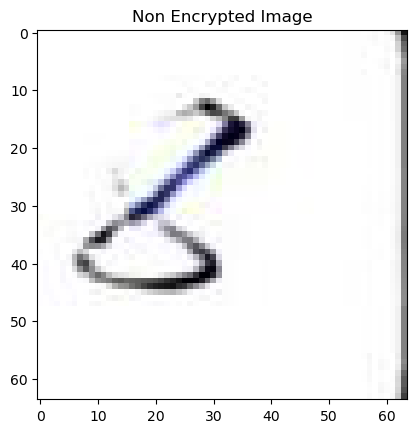

(64, 64, 3)


In [39]:
image_path = './data/Train/TDES/ECB/TDES_ECB_Dec/TDES_Dec_TDES_ECB_Enc_Eight_full (1).jpg'
image = plt.imread(image_path)
plt.imshow(image)
plt.title('Non Encrypted Image')
plt.show()
print(image.shape)

# Saving reshaped encrypted image

In [ ]:
path = './data/Train/TDES/ECB/TDES_ECB_Enc/'
output_path = './data/Train/TDES/ECB/Enc_Img_Readable/'

image_files = [f for f in os.listdir(path) if f.endswith(('.jpg', '.png', '.jpeg'))]

for img_name in image_files:
    # Read the image file as a binary file
    image_path = os.path.join(path, img_name)
    with open(image_path, 'rb') as file:
        encrypted_data = file.read()
    
    # Convert binary data to a NumPy array of integers
    encrypted_array = np.frombuffer(encrypted_data, dtype=np.uint8)

    # Reshape the array into a 2D array for visualization
    height = int(np.sqrt(len(encrypted_array)))
    width = len(encrypted_array) // height
    encrypted_image = encrypted_array[:height * width].reshape((height, width))

    # Convert NumPy array back to image and save it
    reshaped_image = Image.fromarray(encrypted_image)
    output_image_path = os.path.join(output_path, f"reshaped_{img_name}")
    reshaped_image.save(output_image_path)